In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import sklearn

For this notebook to work, you need to have scikit-learn version 1.0 or above. Run the cell below to check the version you have installed. If it is less than 1.0, make sure you install the new version before continuing by going to the command line and using the command `conda install scikit-learn=1.0`

In [2]:
print(sklearn.__version__)

1.3.0


# Regression Tree Parameters

In this notebook you will explore how model parameters can affect the quality of prediction. 

First we create the dataset. 

In [3]:
np.random.seed(234) # do not change the random seed

x = np.random.uniform(0, 10, (10, 1))

def true_function(x):
    return -(1.4 - 3.0 * x) * np.sin(x)

y = true_function(x)

**To Do** vary the hyperparameters of the regression trees below to create the best and worst regression trees you can. Upload your image in insendi. Which parameters matter the most? Which ones matter the least? 

Use the `help(DecisionTreeRegressor)` function to see what the options for the hyperparameter values are. 

In [4]:
x_test = np.linspace(0, 10, 100).reshape(100, 1)

In [9]:

clf_worst = DecisionTreeRegressor(criterion="squared_error",
                            splitter='random', 
                            max_depth=3, 
                            min_samples_split=2,
                            min_samples_leaf=3, 
                            min_weight_fraction_leaf=0.2, 
                            max_features=1, 
                            max_leaf_nodes=2,
                            min_impurity_decrease=1.0)

print(clf_worst.criterion)

clf_worst.fit(x, y)

clf_best = DecisionTreeRegressor(criterion='absolute_error',
                            splitter='random', 
                            max_depth=3, 
                            min_samples_split=2,
                            min_samples_leaf=3, 
                            min_weight_fraction_leaf=0.2, 
                            max_features=1, 
                            max_leaf_nodes=2,
                            min_impurity_decrease=1.0)

clf_best.fit(x, y)

y_test_worst = clf_worst.predict(x_test)
y_test_best = clf_best.predict(x_test)
y_true = true_function(x_test)

squared_error


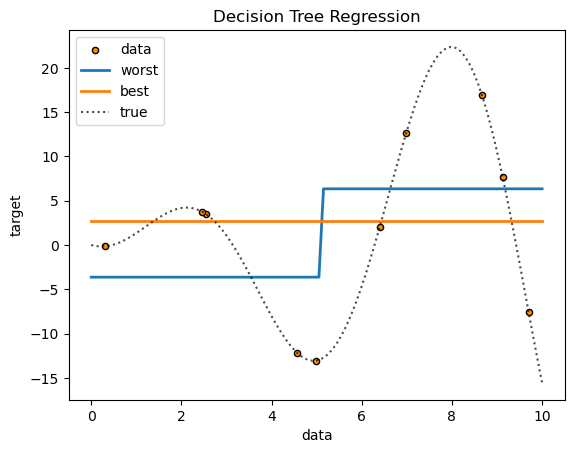

In [10]:
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_test_worst,  linewidth=2, label='worst')
plt.plot(x_test, y_test_best, linewidth=2, label='best')
plt.plot(x_test, y_true, color='k', linestyle=":", alpha=0.7, label='true')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()